<a href="https://colab.research.google.com/github/mohamedamrfarouk/arabic_dialect_classifier/blob/main/deep_learning_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import requests
import numpy as np
import pandas as pd
import json
import re
import json
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import string

In [7]:
df = pd.read_csv('/content/clean_data.csv',lineterminator='\n')

In [8]:
vocab_size = 100000
embedding_dim = 64
max_length = 50
trunc_type='post'
padding_type='post'
oov_tok = "<OOV>"


In [9]:
X = df.text
y = df.dialect
le = LabelEncoder()
le.fit(y)
y = le.transform(y)

In [10]:
yy = np.zeros((len(y), len(le.classes_)))
for i in range(len(y)):
  yy[i][y[i]] = 1

In [11]:
yy[0] , y[0]

(array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0.]), 4)

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, yy, test_size=0.1, random_state=40)

In [13]:
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(X)

word_index = tokenizer.word_index

training_sequences = tokenizer.texts_to_sequences(X_train)
training_padded = pad_sequences(training_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

testing_sequences = tokenizer.texts_to_sequences(X_test)
testing_padded = pad_sequences(testing_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

In [14]:
training_padded = np.array(training_padded)
training_labels = np.array(y_train)
testing_padded = np.array(testing_padded)
testing_labels = np.array(y_test)

In [15]:
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  

In [16]:
def fit_model_and_show_results(model,num_epochs,size):
  callback = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    patience=2,
    restore_best_weights=True,
  )
  model.summary()
  history = model.fit(training_padded, training_labels,
                      epochs=num_epochs,
                      callbacks=[callback], 
                      validation_data=(testing_padded, testing_labels ),
                      batch_size = size)
  plot_graphs(history, "accuracy")
  plot_graphs(history, "loss")

In [17]:
# model1 = tf.keras.Sequential([
#     tf.keras.layers.Embedding(vocab_size, 128),
#     tf.keras.layers.Conv1D(128, 5, activation='relu'),
#     tf.keras.layers.GlobalMaxPooling1D(),

#     tf.keras.layers.Dense(1024, activation='relu'),
#     tf.keras.layers.Dropout(0.5),
    
#     tf.keras.layers.Dense(256, activation='relu'),
#     tf.keras.layers.Dropout(0.5),

#     tf.keras.layers.Dense(64, activation='relu'),
#     tf.keras.layers.Dropout(0.5),

    
#     tf.keras.layers.Dense(32, activation='relu'),
#     tf.keras.layers.Dropout(0.5),

#     tf.keras.layers.Dense(len(le.classes_), activation='softmax')
# ])
# model1.compile(loss='categorical_crossentropy',optimizer=tf.optimizers.Adam(0.005),metrics=['accuracy'])

In [18]:
model_cnn = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Conv1D(16, 5, activation='relu'),
    tf.keras.layers.GlobalMaxPooling1D(),
    tf.keras.layers.Dropout(0.5),

    tf.keras.layers.Dense(len(le.classes_), activation='softmax')
])
model_cnn.compile(loss='categorical_crossentropy',optimizer=tf.optimizers.Adam(0.005),metrics=['accuracy'])

In [19]:
model_gru = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Bidirectional(tf.keras.layers.GRU(32)),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(len(le.classes_), activation='softmax')
    ])
model_gru.compile(loss='categorical_crossentropy',optimizer=tf.optimizers.Adam(0.005),metrics=['accuracy'])

In [20]:
model_lstm = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(embedding_dim)), 
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(len(le.classes_), activation='softmax')
    ])
model_lstm.compile(loss='categorical_crossentropy',optimizer=tf.optimizers.Adam(0.005),metrics=['accuracy'])

In [22]:
model_multiple_lstm = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(embedding_dim, return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(embedding_dim)),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(len(le.classes_), activation='softmax')
])
model_multiple_lstm.compile(loss='categorical_crossentropy',optimizer=tf.optimizers.Adam(0.005),metrics=['accuracy'])

In [23]:
# num_epochs = 10
# history = model.fit(training_padded, y_train,  batch_size = 256, epochs=num_epochs, validation_data=(testing_padded, y_test))

In [24]:
# num_epochs = 10
# history = model.fit(training_padded, y_train,  batch_size = 256, epochs=num_epochs, validation_data=(testing_padded, y_test))

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 50, 64)            6400000   
                                                                 
 conv1d (Conv1D)             (None, 46, 16)            5136      
                                                                 
 global_max_pooling1d (Globa  (None, 16)               0         
 lMaxPooling1D)                                                  
                                                                 
 dropout (Dropout)           (None, 16)                0         
                                                                 
 dense (Dense)               (None, 18)                306       
                                                                 
Total params: 6,405,442
Trainable params: 6,405,442
Non-trainable params: 0
______________________________________________

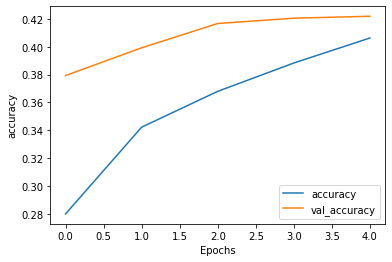

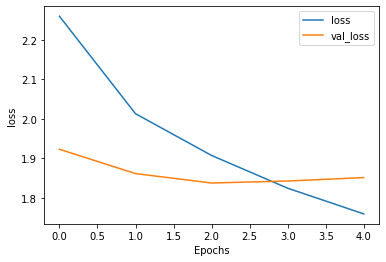

In [25]:
fit_model_and_show_results(model_cnn,10,512)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 50, 64)            6400000   
                                                                 
 bidirectional (Bidirectiona  (None, 64)               18816     
 l)                                                              
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 18)                1170      
                                                                 
Total params: 6,419,986
Trainable params: 6,419,986
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
806/806 [==============================] - 28s 29ms/step - loss: 1.9390 - accuracy: 0.3899 - val_lo

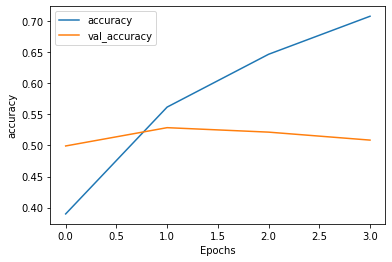

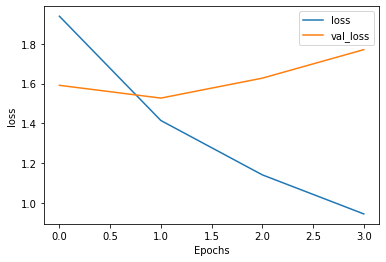

In [26]:
fit_model_and_show_results(model_gru,10,512)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 50, 64)            6400000   
                                                                 
 bidirectional_1 (Bidirectio  (None, 128)              66048     
 nal)                                                            
                                                                 
 dropout_2 (Dropout)         (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 18)                2322      
                                                                 
Total params: 6,468,370
Trainable params: 6,468,370
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
806/806 [==============================] - 33s 36ms/step - loss: 1.8506 - accuracy: 0.4224 - val_lo

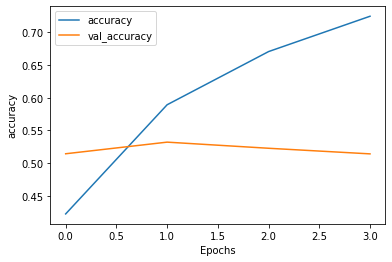

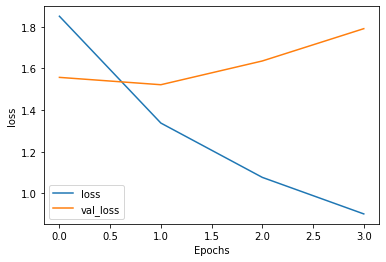

In [27]:
fit_model_and_show_results(model_lstm,10,512)

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, 50, 64)            6400000   
                                                                 
 bidirectional_4 (Bidirectio  (None, 50, 128)          66048     
 nal)                                                            
                                                                 
 bidirectional_5 (Bidirectio  (None, 128)              98816     
 nal)                                                            
                                                                 
 dropout_4 (Dropout)         (None, 128)               0         
                                                                 
 dense_4 (Dense)             (None, 18)                2322      
                                                                 
Total params: 6,567,186
Trainable params: 6,567,186
No

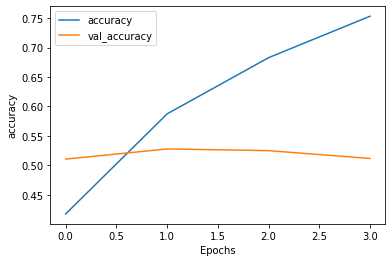

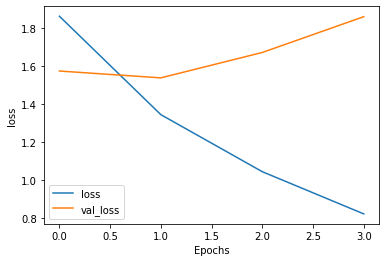

In [28]:
fit_model_and_show_results(model_multiple_lstm,10,512)